In [1]:
using CSV,LinearAlgebra
data = CSV.read("nfl2017.csv")
team = sort(unique(data[7]))

32-element Array{Union{Missing, String},1}:
 "Arizona Cardinals"   
 "Atlanta Falcons"     
 "Baltimore Ravens"    
 "Buffalo Bills"       
 "Carolina Panthers"   
 "Chicago Bears"       
 "Cincinnati Bengals"  
 "Cleveland Browns"    
 "Dallas Cowboys"      
 "Denver Broncos"      
 "Detroit Lions"       
 "Green Bay Packers"   
 "Houston Texans"      
 ⋮                     
 "New England Patriots"
 "New Orleans Saints"  
 "New York Giants"     
 "New York Jets"       
 "Oakland Raiders"     
 "Philadelphia Eagles" 
 "Pittsburgh Steelers" 
 "San Francisco 49ers" 
 "Seattle Seahawks"    
 "Tampa Bay Buccaneers"
 "Tennessee Titans"    
 "Washington Redskins" 

In [2]:
data

,Week,Day,Date,Time,Winner/tie,Column6,Loser/tie,Column8,PtsW,PtsL,YdsW,TOW,YdsL,TOL
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,Thu,September 7,8:30PM,Kansas City Chiefs,@,New England Patriots,boxscore,42,27,537,1,371,0
2,1,Sun,September 10,1:00PM,Pittsburgh Steelers,@,Cleveland Browns,boxscore,21,18,290,1,237,1
3,1,Sun,September 10,1:00PM,Baltimore Ravens,@,Cincinnati Bengals,boxscore,20,0,268,1,221,5
4,1,Sun,September 10,1:00PM,Philadelphia Eagles,@,Washington Redskins,boxscore,30,17,356,2,264,4
5,1,Sun,September 10,1:00PM,Detroit Lions,missing,Arizona Cardinals,boxscore,35,23,367,1,308,4
6,1,Sun,September 10,1:00PM,Jacksonville Jaguars,@,Houston Texans,boxscore,29,7,280,0,203,4
7,1,Sun,September 10,1:00PM,Oakland Raiders,@,Tennessee Titans,boxscore,26,16,359,0,350,0
8,1,Sun,September 10,1:00PM,Atlanta Falcons,@,Chicago Bears,boxscore,23,17,372,0,301,0
9,1,Sun,September 10,1:00PM,Buffalo Bills,missing,New York Jets,boxscore,21,12,408,1,214,2


In [3]:
# remove ties
data = filter(r->r[9]>r[10],data)

# tally the games
V = zeros(32,32)
for g = 1:size(data,1)
    winner = findfirst(data[g,5].==team)
    loser = findfirst(data[g,7].==team)
    V[winner,loser] += 1
end

In [4]:
V

32×32 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  2.0  1.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0  2.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  2.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  2.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  1.0  0.0  0.0  0.0  2.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  …  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  2.0  1.0  1.0     0.0  0.0  0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0 

In [5]:
using SparseArrays
V = sparse(V);

In [6]:
V

32×32 SparseMatrixCSC{Float64,Int64} with 233 stored entries:
  [9 ,  1]  =  1.0
  [11,  1]  =  1.0
  [13,  1]  =  1.0
  [18,  1]  =  2.0
  [26,  1]  =  1.0
  [29,  1]  =  1.0
  [32,  1]  =  1.0
  [4 ,  2]  =  1.0
  [5 ,  2]  =  1.0
  [19,  2]  =  1.0
  [20,  2]  =  1.0
  [21,  2]  =  1.0
  ⋮
  [19, 31]  =  1.0
  [21, 31]  =  1.0
  [25, 31]  =  1.0
  [27, 31]  =  1.0
  [28, 31]  =  1.0
  [9 , 32]  =  2.0
  [16, 32]  =  1.0
  [17, 32]  =  1.0
  [20, 32]  =  1.0
  [22, 32]  =  1.0
  [23, 32]  =  1.0
  [26, 32]  =  2.0

In [10]:
varinfo(Main,r"V")

| name |      size | summary                              |
|:---- | ---------:|:------------------------------------ |
| V    | 4.055 KiB | 32×32 SparseMatrixCSC{Float64,Int64} |


In [12]:
F = Matrix(V);
varinfo(Main,r"F")

| name |      size | summary                |
|:---- | ---------:|:---------------------- |
| F    | 8.039 KiB | 32×32 Array{Float64,2} |


In [13]:
# count losses
losses = sum(V,dims=1)

1×32 Array{Float64,2}:
 8.0  7.0  7.0  8.0  6.0  11.0  9.0  …  3.0  4.0  10.0  7.0  11.0  8.0  9.0

In [14]:
losses[8]

16.0

In [16]:
c = zeros(32); c[8] = 1.;

In [28]:
c = rand(32); c = c/sum(c);
cnew = 0*c;
rows,vals = rowvals(V),nonzeros(V)
for t = 1:32
    # redistribute team t's share
    for i in nzrange(V,t)
        cnew[rows[i]] += c[t]*vals[i]/losses[t]
    end
end

┌ Info: Recompiling stale cache file /Users/driscoll/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1187


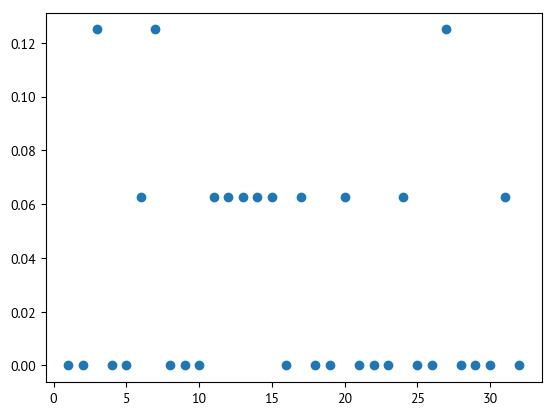

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1456660b8>

In [18]:
using PyPlot
plot(1:32,cnew,"o")

In [19]:
sum(cnew)

1.0

In [20]:
function redist(c)
    cnew = 0*c
    for t = 1:32
        # redistribute team t's share
        for i in nzrange(V,t)
            cnew[rows[i]] += c[t]*vals[i]/losses[t]
        end
    end
    return cnew
end

redist (generic function with 1 method)

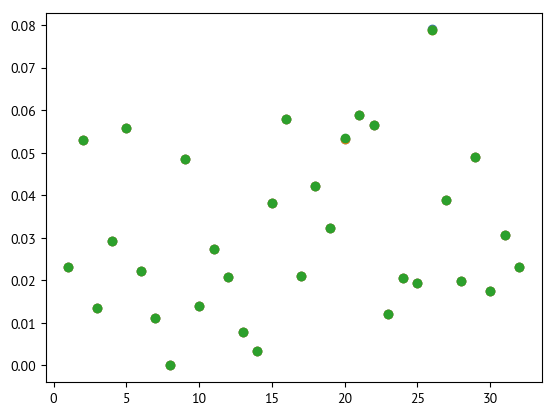

In [34]:
for j = 1:3
    c = redist(c)
    plot(1:32,c,"o")
end

In [35]:
findmax(c)

(0.07894033796697149, 26)

In [36]:
team[ans[2]]

"Philadelphia Eagles"

In [37]:
p = sortperm(c,rev=true)
[ team[p] c[p] ]

32×2 Array{Any,2}:
 "Philadelphia Eagles"   0.0789403 
 "New England Patriots"  0.0587574 
 "Kansas City Chiefs"    0.0579674 
 "New Orleans Saints"    0.0565655 
 "Carolina Panthers"     0.0557252 
 "Minnesota Vikings"     0.0533351 
 "Atlanta Falcons"       0.0529583 
 "Seattle Seahawks"      0.0490074 
 "Dallas Cowboys"        0.0484022 
 "Los Angeles Rams"      0.042246  
 "Pittsburgh Steelers"   0.038918  
 "Jacksonville Jaguars"  0.0381693 
 "Miami Dolphins"        0.0322365 
 ⋮                                 
 "Green Bay Packers"     0.0207668 
 "New York Jets"         0.0206138 
 "San Francisco 49ers"   0.0199248 
 "Oakland Raiders"       0.0194068 
 "Tampa Bay Buccaneers"  0.0174737 
 "Denver Broncos"        0.0140206 
 "Baltimore Ravens"      0.0135483 
 "New York Giants"       0.0121195 
 "Cincinnati Bengals"    0.0110538 
 "Houston Texans"        0.00793154
 "Indianapolis Colts"    0.0033145 
 "Cleveland Browns"      0.0       

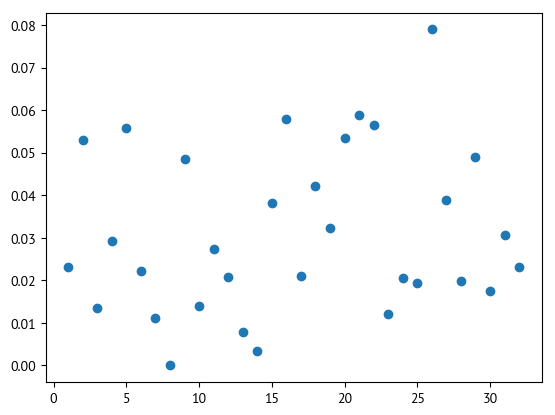

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1468a7208>

In [38]:
x = rand(32)
x = x/sum(x)
A = V./losses
for k = 1:12
    x = A*x
end
plot(1:32,x,"o")

In [39]:
norm(A*x-x)

2.869475074836201e-6

In [41]:
eigvals(Matrix(A))

32-element Array{Complex{Float64},1}:
     1.000000000000001 + 0.0im                
    0.5149727036939494 + 0.0im                
   0.46197764827206494 + 0.0im                
  -0.13787097218495337 + 0.4465937566864588im 
  -0.13787097218495337 - 0.4465937566864588im 
    0.2410273345374055 + 0.0913310601916709im 
    0.2410273345374055 - 0.0913310601916709im 
  -0.15064090049890838 + 0.37068768287127674im
  -0.15064090049890838 - 0.37068768287127674im
   0.07212019225035901 + 0.20620972911260615im
   0.07212019225035901 - 0.20620972911260615im
 0.0004605476627004314 + 0.265537036923418im  
 0.0004605476627004314 - 0.265537036923418im  
                       ⋮                      
    -0.085589348118176 - 0.1983971019278958im 
 -0.019299530234382554 + 0.10835657852092102im
 -0.019299530234382554 - 0.10835657852092102im
  -0.16156870601142523 + 0.0im                
  -0.14569361043316953 + 0.06028088602233825im
  -0.14569361043316953 - 0.06028088602233825im
  -0.07398598448716692